### Exercise: 6 - Transfer MNIST

In [92]:
import matplotlib.pyplot as plt
# Imports
import numpy as np
from keras.src.optimizers import Adam
from tensorflow import keras

### Import EMNIST

In [93]:
from scipy.io import loadmat

def load_emnist_dataset(dtype: str="balanced"):
    # Read file and temporarily store it
    folder_path = "./emnist-matlab/matlab"
    
    file_name = folder_path + "/emnist-" + dtype + ".mat"
    
    data = loadmat(file_name)
    data = data["dataset"]

    input_train = data["train"][0, 0]["images"][0, 0]
    target_train = data["train"][0, 0]["labels"][0, 0].flatten()
    input_test = data["test"][0, 0]["images"][0, 0]
    target_test = data["test"][0, 0]["labels"][0, 0].flatten()
    mapping = data["mapping"][0, 0]
        
    # Reshape input data
    # Source: https://stackoverflow.com/a/53547262
    input_train = input_train.reshape(
        (input_train.shape[0], 28, 28), order="F"
    )
    input_test = input_test.reshape(
        (input_test.shape[0], 28, 28), order="F"
    )
    return (input_train, target_train), (input_test, target_test), mapping

46
10



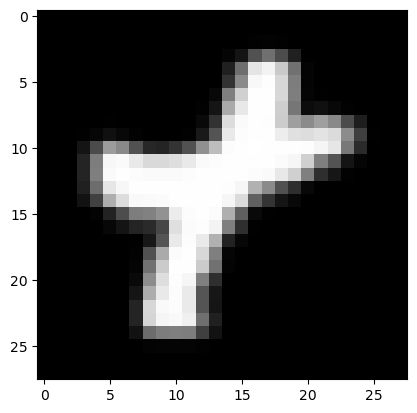

In [94]:
(x_train, y_train), (x_test, y_test), mapped = load_emnist_dataset()

#print(y_train)
print(np.max(y_train))
print(np.argmax(y_train))
num_classes = 47
# separate x_train in X_train and X_val, same for y_train
X_train=x_train[0:90000] / 255 #divide by 255 so that they are in range 0 to 1
Y_train=y_train[0:90000] #keras.utils.to_categorical(y_train[0:90000], num_classes)

X_val=x_train[90000:131600] / 255
Y_val=y_train[90000:131600] #keras.utils.to_categorical(y_train[90000:131600], num_classes)

X_test=x_test / 255
Y_test=y_test #keras.utils.to_categorical(y_test, num_classes)

#print(X_test[0])

del x_train, y_train, x_test, y_test

X_train=np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val=np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test=np.reshape(X_test, (X_test.shape[0],28,28,1))

plt.imshow(X_train[10], cmap="gray")
print()

#print(mapped)
#print(X_train.shape)
#print(X_val.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_val.shape)
#print(Y_test.shape)

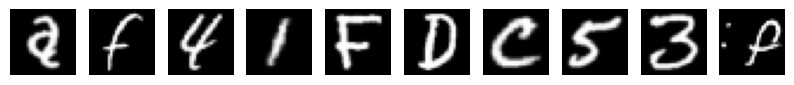

In [109]:
def mapping(arg: int):
    _, mapped_value = mapped[arg][:]
    return chr(mapped_value)

def plot_images(images, labels=None, num_images=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        if labels is not None:
            plt.title(mapping(np.argmax(labels[i])))
        plt.axis('off')
    plt.show()

plot_images(X_train, num_images=10)

In [96]:
from keras.src.utils import to_categorical

valid_hex_chars = '0123456789ABCDEFabcdef'
valid_hex_ascii = [ord(char) for char in valid_hex_chars]

valid_hex_labels = []
for i in mapped:
    label, asc = i
    if asc in valid_hex_ascii:
        valid_hex_labels.append(label)

#valid_hex_labels = [np.where(np.isin(valid_hex_ascii, mapped[:][:][0]))]

valid_hex_labels = np.array(valid_hex_labels)

print(valid_hex_labels)
train_indices = np.where(np.isin(Y_train, valid_hex_labels))[0]
test_indices = np.where(np.isin(Y_test, valid_hex_labels))[0]
val_indices = np.where(np.isin(Y_val, valid_hex_labels))[0]

print(f"valid_hex_labels: {len(valid_hex_labels)}")

print(f"train indices: {len(train_indices)}")
print(f"test indices: {len(test_indices)}")
print(f"val indices: {len(val_indices)}")

print(train_indices)

print(valid_hex_ascii)
print(valid_hex_labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 36 37 38 39 40]
valid_hex_labels: 21
train indices: 40141
test indices: 8400
val indices: 10259
[    1     3     4 ... 89994 89996 89998]
[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 97, 98, 99, 100, 101, 102]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 36 37 38 39 40]


val indices 10259
Yval 22800
36


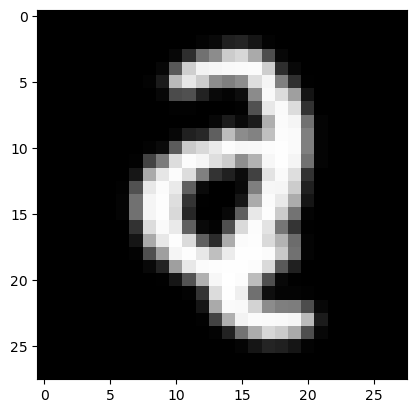

In [97]:
# One Hot-Encoding and Filtering based on train_indices

X_train = X_train[train_indices]
X_val = X_val[val_indices]
X_test = X_test[test_indices]

#print("val indices", len(val_indices))
#print("Yval", len(Y_val))

Y_train = Y_train[train_indices]
Y_val = Y_val[val_indices]
Y_test = Y_test[test_indices]

plt.imshow(X_train[0], cmap="gray")
#print(Y_train[0])


num_classes = np.max(valid_hex_labels) + 1
Y_train = to_categorical(Y_train, num_classes)
Y_val = to_categorical(Y_val, num_classes)
Y_test = to_categorical(Y_test, num_classes)

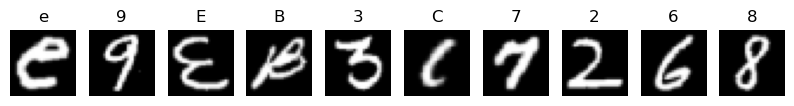

In [110]:
plot_images(X_test, Y_test, num_images=10)

### Relabel data

In [99]:
#def relabel(labels, threshold=5):
#    relabeled = []
#    for label in labels:
#        if np.argmax(label) >= threshold:
#            relabeled.append([1,0])
#        else:
#            relabeled.append([0,1])
#    return np.array(relabeled, dtype=np.float32)

#Y_train_relabeled=relabel(Y_train)
#Y_test_relabeled=relabel(Y_test)
#print(f"original shape: {Y_train.shape}")
#print(f"relabeled shape: {Y_train_relabeled.shape}")

### Load CNN Model from last exercise

In [100]:
base_model = keras.models.load_model('../aufgabe5/e6.keras')

# Remove last layer from base_model
base_model.pop()
base_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3136)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,710 (463.71 KB)

 Trainable params: 18,656 (72.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 100,054 (390.84 KB)

In [116]:
from keras.src.layers import Dense

# freeze model
for layer in base_model.layers:
    layer.trainable = False

inputs = base_model.inputs
x = base_model(inputs, training=False)
output = Dense(41, activation='softmax')(base_model.layers[-1].output)

model = keras.Model(inputs=inputs, outputs=output)

In [117]:
learning_rate = 1e-4
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
model.build(input_shape=(None,28,28,1))
model.summary()

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 41)             │       128,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,273 (575.29 KB)

 Trainable params: 128,617 (502.41 KB)

 Non-trainable params: 18,656 (72.88 KB)

In [118]:
loss0, accuracy0 = model.evaluate(x=X_test, y=Y_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0210 - loss: 4.0943


In [121]:
epochs = 10

history = model.fit(X_train, Y_train, epochs=epochs, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9477 - loss: 0.1528 - val_accuracy: 0.9313 - val_loss: 0.1926
Epoch 2/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9527 - loss: 0.1441 - val_accuracy: 0.9303 - val_loss: 0.1910
Epoch 3/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9541 - loss: 0.1371 - val_accuracy: 0.9325 - val_loss: 0.1890
Epoch 4/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9534 - loss: 0.1403 - val_accuracy: 0.9313 - val_loss: 0.1881
Epoch 5/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9574 - loss: 0.1309 - val_accuracy: 0.9312 - val_loss: 0.1883
Epoch 6/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9586 - loss: 0.1243 - val_accuracy: 0.9319 - val_loss: 0.1905
Epoch 7/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9570 - loss: 0.1261 - val_accuracy: 0.9296 - val_loss: 0.1887
Epoch 8/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9592 - loss: 0.1221 - 

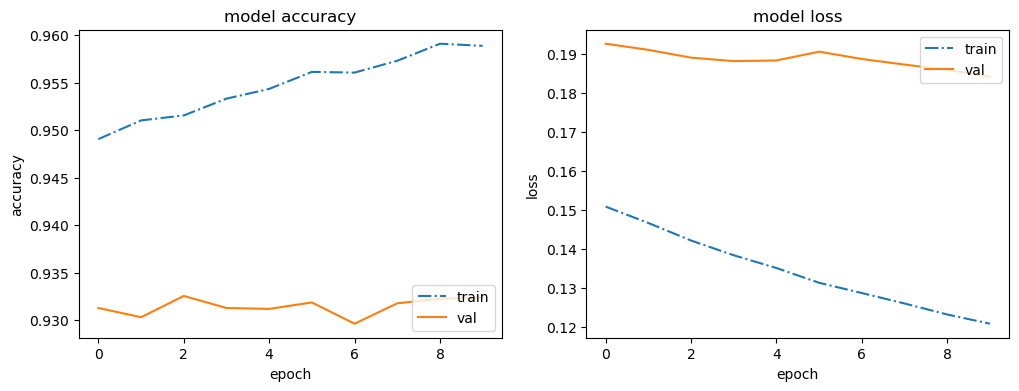

In [122]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

In [123]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(pred, axis=1)))
acc_fc_orig = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acc_fc_orig_flat = ", acc_fc_orig)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[389   0   0   0   0   0   1   0   0   0   0   0   0   8   0   0   1   1
    0   0   0]
 [  0 396   2   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  1   1 385   1   0   0   0   0   3   0   0   2   0   1   0   0   5   0
    1   0   0]
 [  1   0   0 389   0   3   0   0   3   3   0   0   0   0   0   0   0   0
    0   0   1]
 [  0   0   0   0 390   0   0   0   0   3   0   0   0   0   0   0   2   0
    2   0   3]
 [  0   0   0   2   0 389   0   0   2   3   0   0   0   0   1   1   0   1
    0   0   1]
 [  0   0   0   0   0   1 380   0   0   0   0   0   1   0   0   0   0  18
    0   0   0]
 [  0   1   1   0   1   0   0 395   0   2   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   2   0   0 389   1   0   3   0   1   0   0   0   0
    1   2   1]
 [  0   0   0   0   1   0   0   1   1 392   0   0   0   0   0   0   5   0
    0   0   0]
 [  0   0   0   0   2   0   0   0   0   0 388   0   0   0   0   0   7